## Spam Classification using Naive Bayes

### Naive Bayes

This assumes that the presence of a certain feature in a class is independent of the presence of other features.
EX: fruit can be classified as watermelon if its color is green, tastes sweet and round, but these features could be depends on each other. But we are assuming they are independent and that's why the name came as 'Naive'.

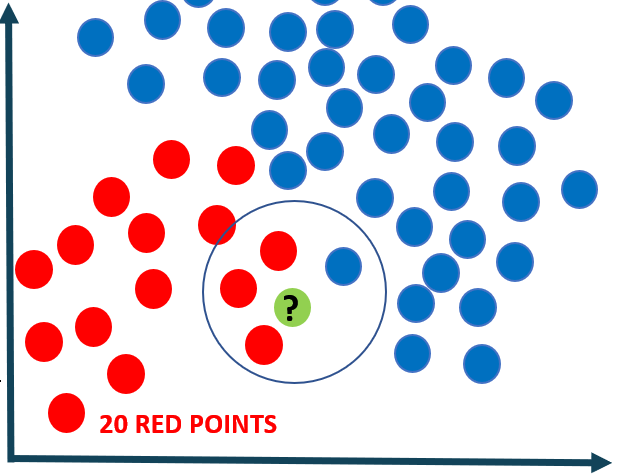

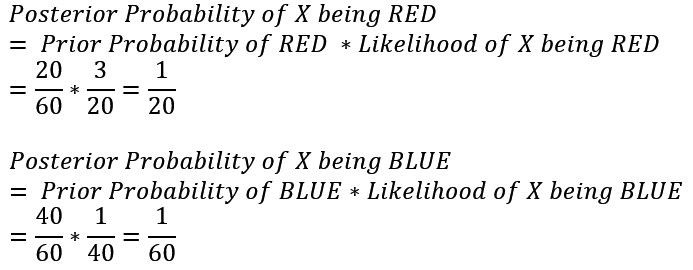



Prior probability = Total number of red points/Total number of points

Posterior probability = Number of red points in the vicinity /Total number of red points

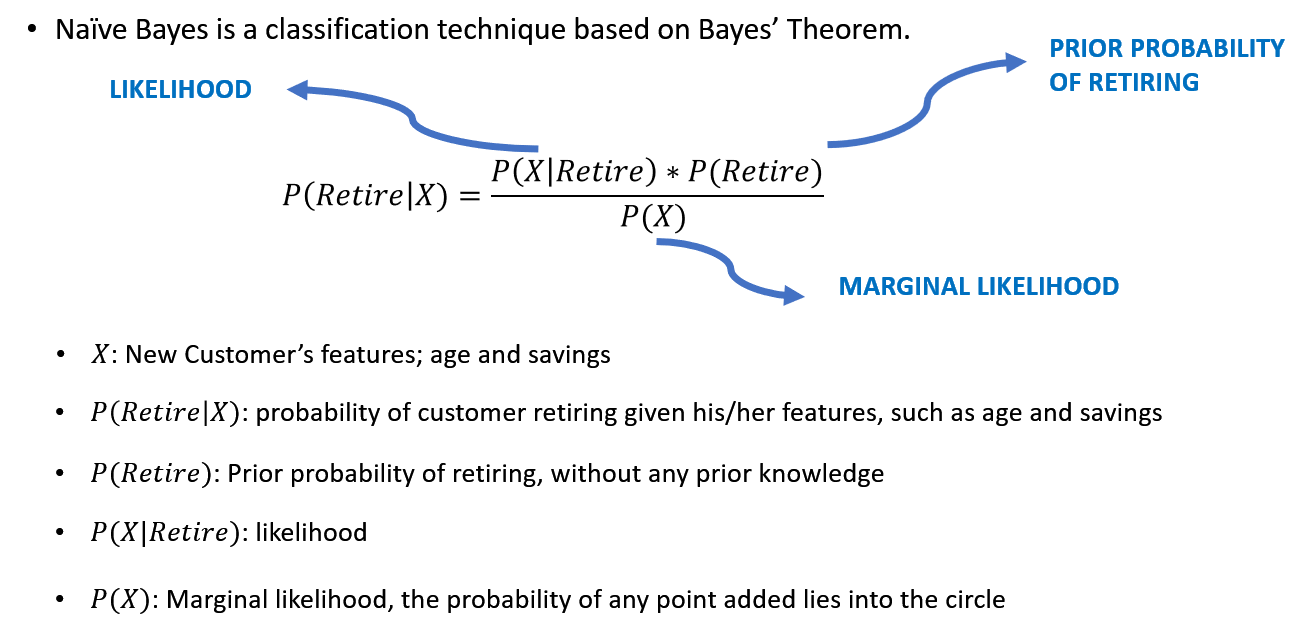

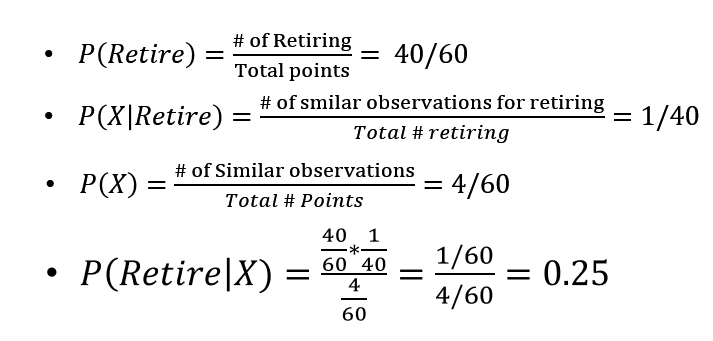

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [2]:
spam_df = pd.read_csv('emails.csv')

### Exploring data

In [3]:
spam_df.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
spam_df.info()
# if there is any null data we have to fil them or delete the whole row

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
# Let's see which message is the most popular ham/spam message
spam_df.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
0     4360   4327  Subject: re : i am zhendong  zhendong ,  thank...    2
1     1368   1368  Subject: award winning notification  netherlan...    1

In [7]:
# Let's get the length of the messages
spam_df['length'] = spam_df['text'].apply(len)
spam_df.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


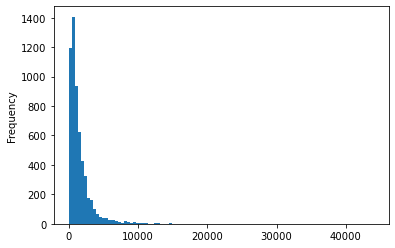

In [8]:
spam_df['length'].plot(bins=100, kind='hist') 


In [9]:
# Let's see the longest message 43952
spam_df[spam_df['length'] == 43952]['text'].iloc[0]

'Subject: from the enron india newsdesk - april 27 th newsclips  fyi news articles from indian press .  - - - - - - - - - - - - - - - - - - - - - - forwarded by sandeep kohli / enron _ development on 04 / 27 / 2001 08 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  nikita varma  04 / 27 / 2001 07 : 51 am  to : nikita varma / enron _ development @ enron _ development  cc : ( bcc : sandeep kohli / enron _ development )  subject : from the enron india newsdesk - april 27 th newsclips  friday apr 27 2001 , http : / / www . economictimes . com / today / cmo 3 . htm  dpc board empowers md to cancel mseb contract  friday apr 27 2001 , http : / / www . economictimes . com / today / 27 compl 1 . htm  mseb pays rs 134 cr under \' protest \' to dpc  friday , april 27 , 001 , http : / / www . businessstandard . com / today / economy 4 . asp ? menu = 3  enron india md authorised to terminate ppa  friday , april 27 , 2001 , http : / / www . financialexpress . com / fe 20010427 / topl 

### Visualize the Data

In [10]:
ham = spam_df[spam_df['spam'] == 0]
spam = spam_df[spam_df['spam'] == 1]

In [11]:
ham

,text,spam,length
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0,1188
1369,Subject: sacramento weather station fyi - - ...,0,1997
1370,Subject: from the enron india newsdesk - jan 1...,0,7902
1371,Subject: re : powerisk 2001 - your invitation ...,0,3644
1372,Subject: re : resco database and customer capt...,0,5535
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


In [12]:
spam

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1,347
1364,Subject: would you like a $ 250 gas card ? do...,1,188
1365,"Subject: immediate reply needed dear sir , i...",1,3164
1366,Subject: wanna see me get fisted ? fist bang...,1,734


Spam percentage =  23.88268156424581 %
ham percentage =  76.11731843575419 %


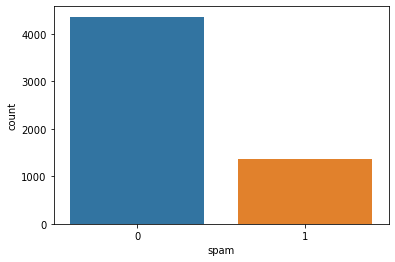

In [13]:
# plot the percentages
print('Spam percentage = ',len(spam)/len(spam_df)*100,'%')
print('ham percentage = ',len(ham)/len(spam_df)*100,'%')
#Count plot in seaborn
sns.countplot(spam_df['spam'], label = 'count spam vs Ham')

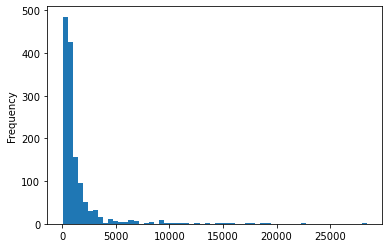

In [14]:
spam['length'].plot(bins=60, kind='hist') 

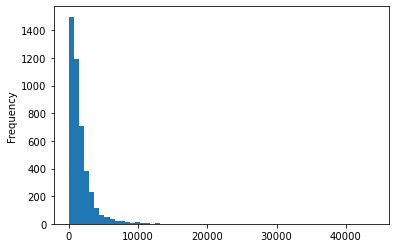

In [15]:
ham['length'].plot(bins=60, kind='hist') 

### Clean the Data (Countvectorizer would usually take care of the puncuations and stopwords)

In [16]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pavit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# Let's test the newly added function
spam_df_clean = spam_df['text'].apply(message_cleaning)

In [18]:
print(spam_df['text'][0])
print(spam_df_clean[0])

Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  mar

### Vectorizer  Example : convert the text into a matrix format

In [19]:
# Count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [20]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [21]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


#### let's apply to out data set to countvectorizer

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer()
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])

In [23]:
print(vectorizer.get_feature_names())

['00', '000', '0000', '000000', '00000000', '0000000000', '000000000003619', '000000000003991', '000000000003997', '000000000005168', '000000000005409', '000000000005411', '000000000005412', '000000000005413', '000000000005820', '000000000006238', '000000000006452', '000000000007494', '000000000007498', '000000000007876', '000000000010552', '000000000011185', '000000000012677', '000000000012734', '000000000012735', '000000000012736', '000000000012738', '000000000012741', '000000000012987', '000000000013085', '000000000013287', '000000000015384', '000000000015793', '000000000023619', '000000000024099', '000000000025307', '000000000025312', '000010220', '0000102317', '0000102374', '0000102789', '0000104281', '0000104282', '0000104486', '0000104631', '0000104730', '0000104776', '0000104778', '0000107043', '0000108729', '000066', '0001', '000166', '0002', '000202', '0003', '0004', '0005', '0006', '00076', '0009249480', '0009249481', '0009249504', '0009249505', '0009249506', '001', '0011', 

In [24]:
print(spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
spamham_countvectorizer.shape
# 5728 rows or the messages with 37,303 columns

(5728, 37303)

### Model Training with Naive Bayes

In [26]:
label = spam_df['spam'].values
label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [27]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(spamham_countvectorizer, label)

MultinomialNB()

In [28]:
testing_sample = ['Free Money!!!', 'Hi John, thanks for your gift', 'Yay, you won this lottery!!!']

In [29]:
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

In [30]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0, 1], dtype=int64)

### Let's Split the data sets and train the model

In [31]:
X = spamham_countvectorizer
y =label

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [33]:
print("Total sample size : ",X.shape[0])
print("Training sample size : ",X_train.shape[0])

Total sample size :  5728
Training sample size :  4582


In [34]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

### Evaluate the Model

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
y_predict_train = NB_classifier.predict(X_train)

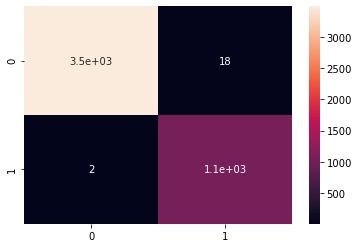

In [37]:
cm = confusion_matrix(y_train,y_predict_train)
sns.heatmap(cm, annot = True)

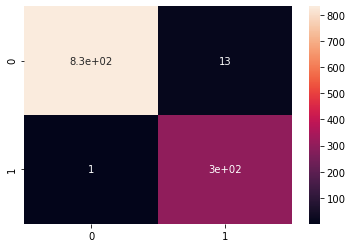

In [38]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm, annot=True)

In [39]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       845
           1       0.96      1.00      0.98       301

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146

